# Importing necessary libraries which might be used during analysis

In [1]:
# Following Libraries are being used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import ctypes
import os.path
import re
import os
import statsmodels.api as sm
from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #Linear Regressor

## Reading the data

In [2]:
data=pd.read_csv("Suicide_Detection_clean.csv")

## Seeing the first five records of the dataset

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,text,class
0,0,2,ex wife threatening suiciderecently i left my ...,suicide
1,1,3,am i weird i dont get affected by compliments ...,non-suicide
2,2,4,finally 2020 is almost over so i can never hea...,non-suicide
3,3,8,i need helpjust help im crying so hard,suicide
4,4,9,im so losthello my name is adam 16 and ive bee...,suicide


## Finding the shape that means number of rows and columns in the dataset

In [4]:
# Check dimensions of the data
data.shape

(232074, 4)

## Checking each column datatype which will be helpful to identift the technique to apply in each column

In [5]:
# Check Datatypes
data.dtypes

Unnamed: 0       int64
Unnamed: 0.1     int64
text            object
class           object
dtype: object

## Counting the number of missing values in each column

In [6]:
# Check missing values in each column of training data
data.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
text            50
class            0
dtype: int64

## Filling the missing values and also counting total number of values present in both the classes

In [7]:
data = data.fillna('')

data['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

## Here we can see that the dataset is balanced that is each class contains equal number of records

## Plotting this data for visualization purpose

Text(0.5, 0.98, 'Categorical Plotting')

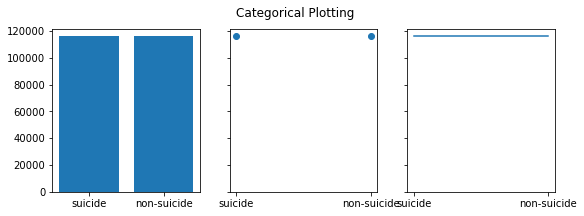

In [8]:
df = data['class'].value_counts()
names = list(df.keys())
values = list(df.values)

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

## Transforming the sentences and then calculating the acurracy score with the help of Logistic Regression

In [9]:
df_ml = data

sentences = data['text'].values
y = df_ml['class'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(
sentences, y, test_size=0.20, random_state=1000)


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print('Score-Logistic Regression', score)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score-Logistic Regression 0.9261230205752451


## Deploying the above obtained accuracy model

In [10]:
#Prediction deployment function sample
def predict_category(s,train=y,model=classifier):
    V=[s]
    vect = CountVectorizer()
    vect.fit(V)
    pr = vectorizer.transform(V)
    pred=model.predict(pr)
    
    return pred[0]

## Predicting by giving self made example

In [11]:
predict_category('I am enjoying my life to full extent as it is beautiful')

'non-suicide'

## Truly classified that is sentence is non-suicide and it also predicted non-suicide

In [14]:
#Error analysis
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(classifier,X_train,y_train,cv=3)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

## Making confusion matrix with the help of sklearn and mapping it which consists of true positive, true negative,false positive,false negative

[0.91116157 0.94770402]
[0.95004789 0.90717136]
[0.9301985  0.92699483]


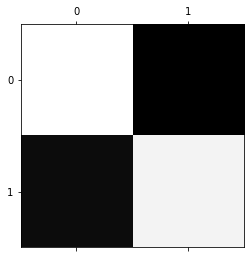

In [15]:
from sklearn.metrics import precision_score,recall_score,f1_score

print(precision_score(y_train,y_train_pred,average=None))
print(recall_score(y_train,y_train_pred,average=None))
print(f1_score(y_train,y_train_pred,average=None))

from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(y_train,y_train_pred)

plt.matshow(conf_matrix,cmap=plt.cm.gray)